# LINEAR REGRESSION PROJECT

In [1]:
import pandas as pd

data_insurance = pd.read_csv ("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")

data_insurance.to_csv ("/workspaces/Linear_Regression_LeryBenavides/data/raw/DATASER_ORIGINAL.csv", index=False)
data_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
data_insurance.shape

(1338, 7)

In [3]:
data_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Analisis univariable

<Axes: xlabel='charges', ylabel='Count'>

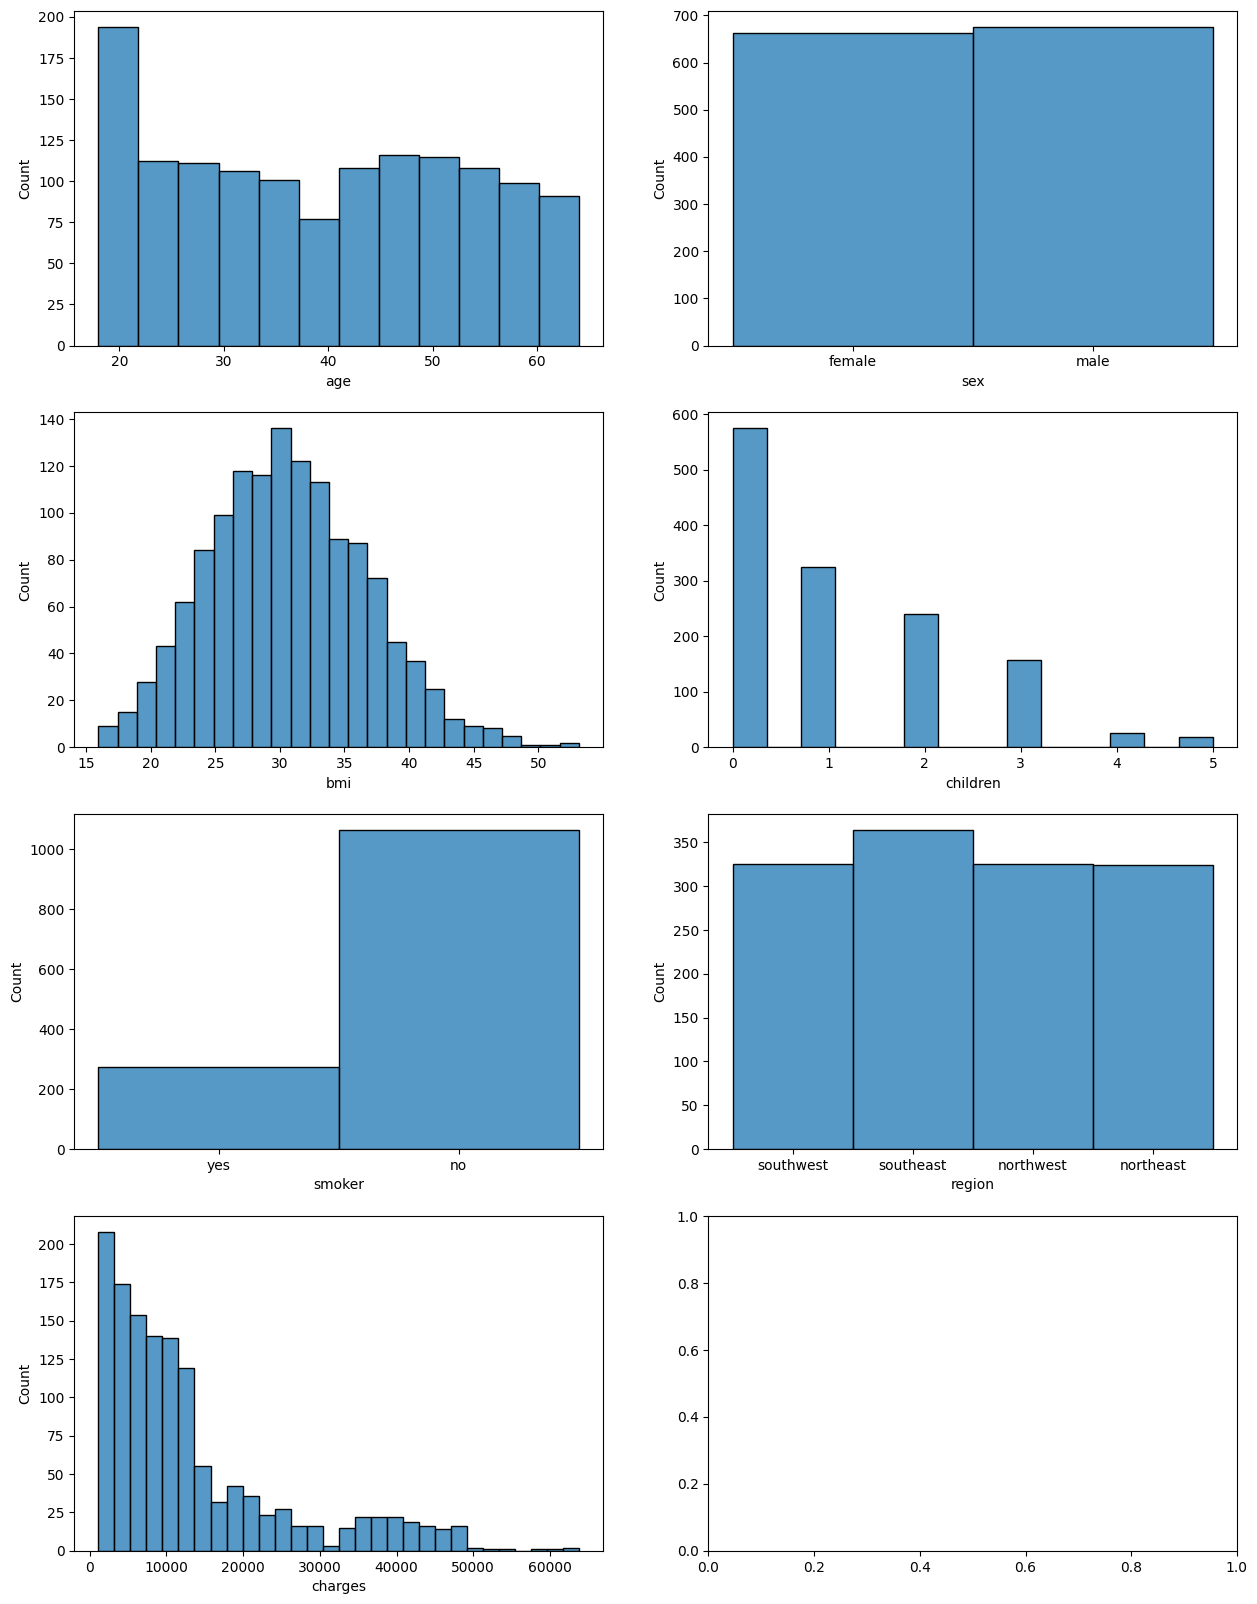

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots (4, 2, figsize = (15,20))

sns.histplot (data_insurance, x= "age", ax = axis[0,0])
sns.histplot (data_insurance, x= "sex", ax = axis[0,1])
sns.histplot (data_insurance, x= "bmi", ax = axis[1,0])
sns.histplot (data_insurance, x= "children", ax = axis[1,1])
sns.histplot (data_insurance, x= "smoker", ax = axis[2,0])
sns.histplot (data_insurance, x= "region", ax = axis[2,1])
sns.histplot (data_insurance, x= "charges", ax = axis[3,0])


### Analisis numerico (univariable)

<Axes: xlabel='bmi'>

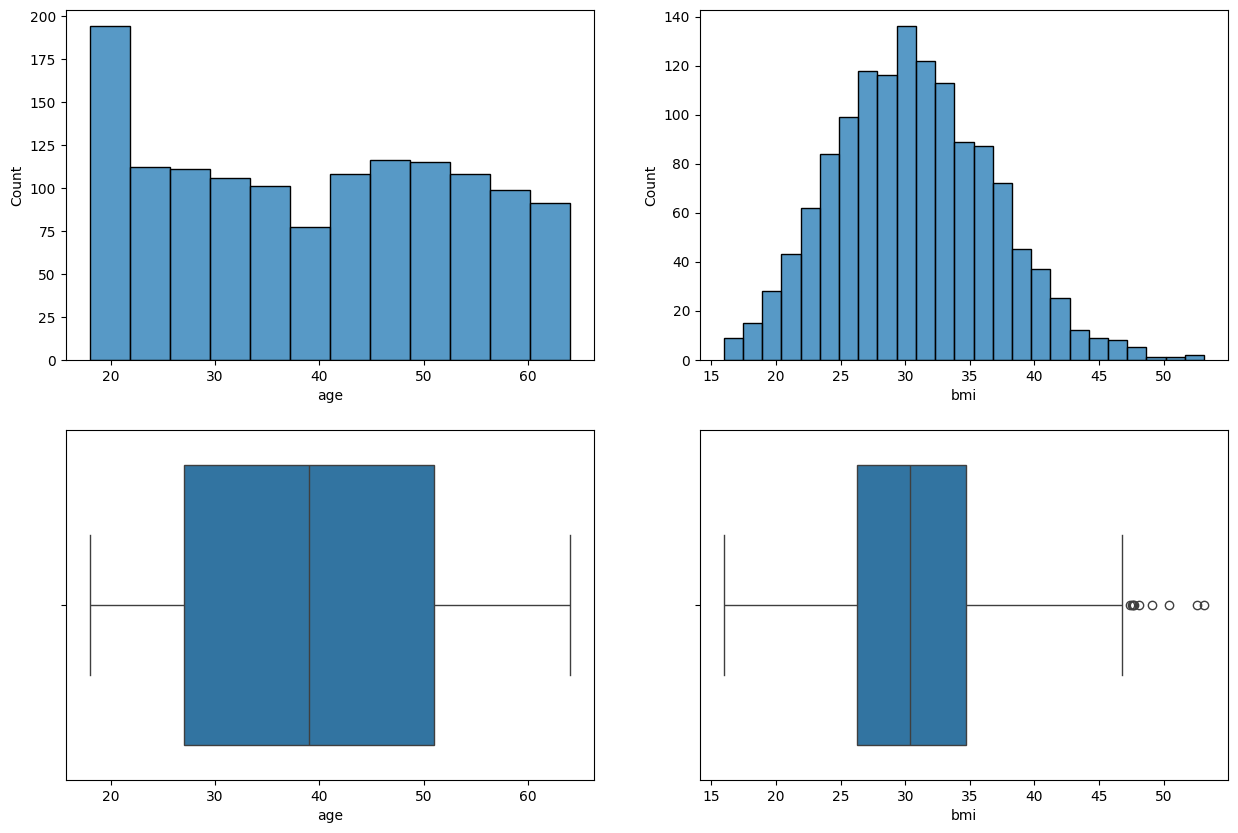

In [5]:
fig, axis = plt.subplots (2,2, figsize = (15,10))

sns.histplot (data_insurance, x = "age", ax = axis [0,0])
sns.boxplot (data_insurance, x = "age", ax = axis[1,0])

sns.histplot (data_insurance, x = "bmi", ax = axis [0,1])
sns.boxplot (data_insurance, x = "bmi", ax = axis[1,1])

### Analisis multivariable / Numerico-Numerico

<Axes: >

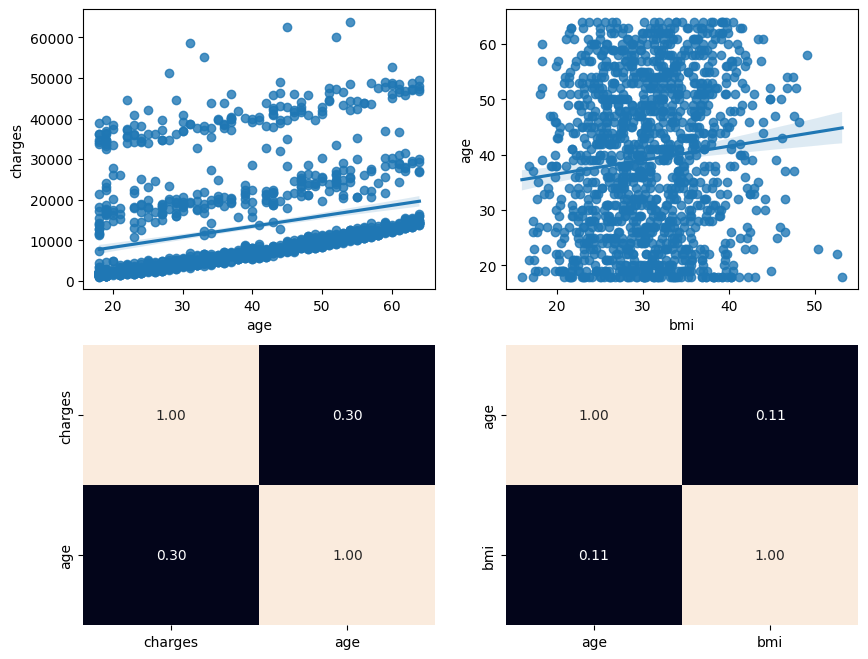

In [6]:
fig, axis = plt.subplots(2, 2, figsize = (10, 8))

sns.regplot (data_insurance, x = "age", y = "charges", ax = axis[0,0])
sns.heatmap (data_insurance[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1,0], cbar = False)

sns.regplot (data_insurance, x = "bmi", y = "age", ax = axis[0,1])
sns.heatmap (data_insurance[["age", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1,1], cbar = False)

### Analisis multivariable / Categorico - Categorico

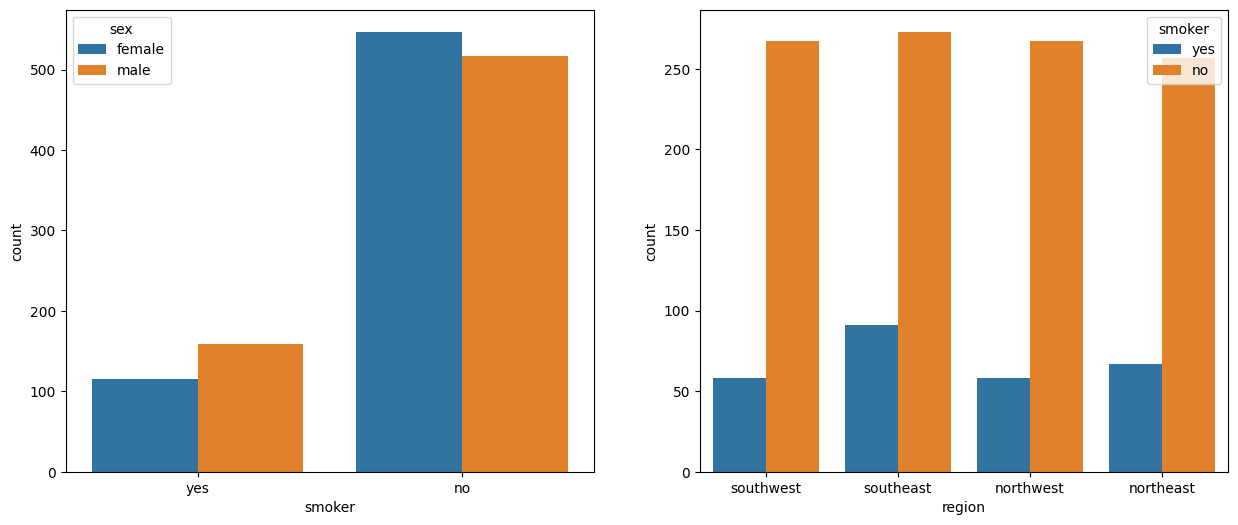

In [7]:
fig, axis = plt.subplots (1, 2, figsize = (15,6))

sns.countplot (data_insurance, x = "smoker", hue = "sex", ax = axis [0])
sns.countplot (data_insurance, x = "region", hue = "smoker", ax = axis [1])

plt.show()

### Analisis multivariable / Categorico - Numerico

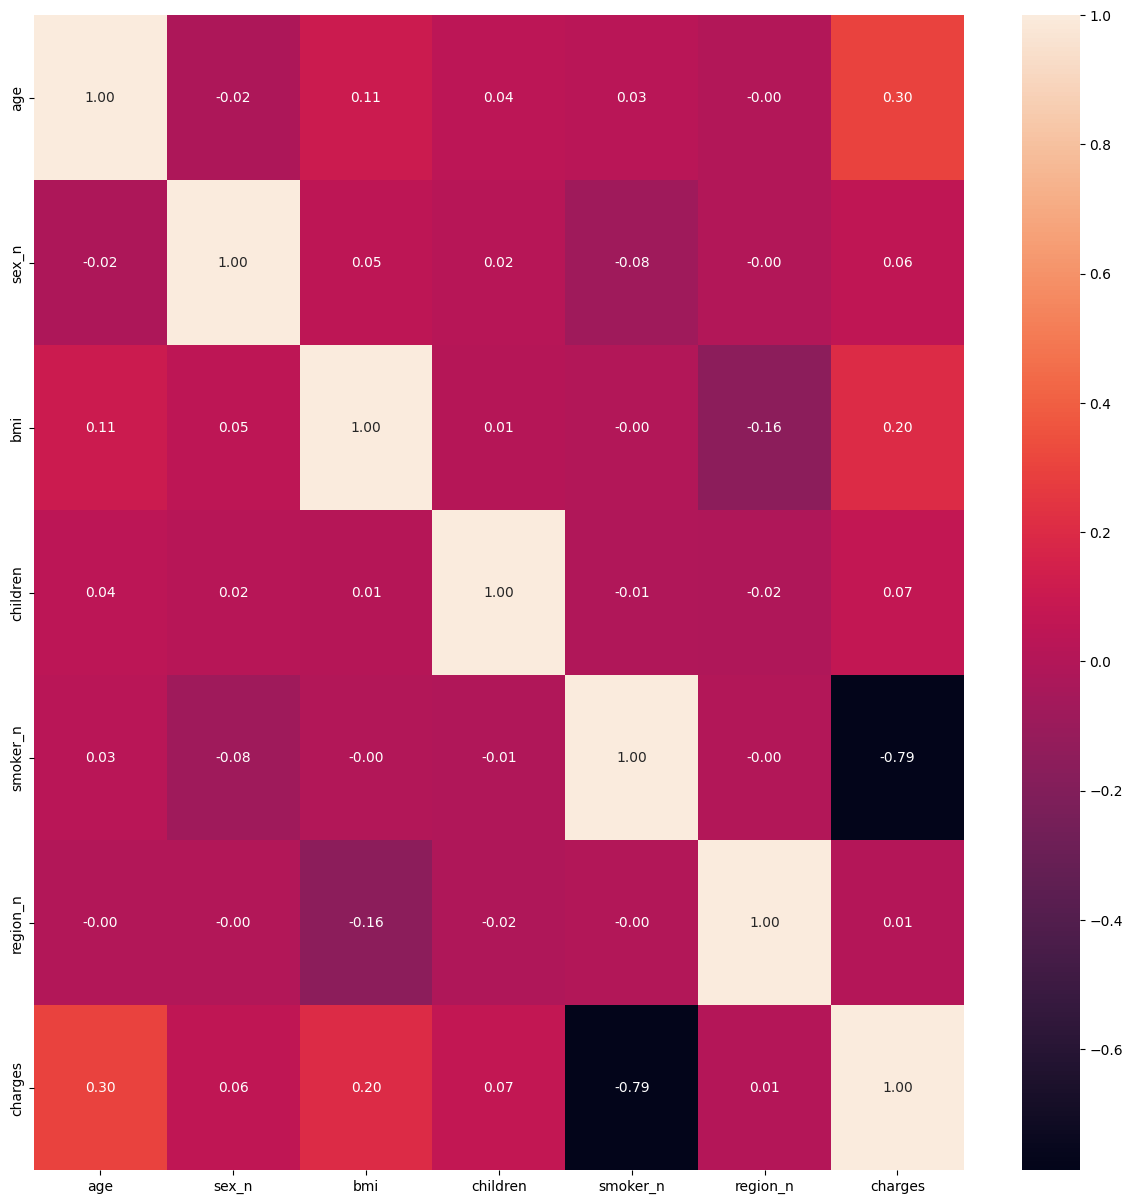

In [8]:
data_insurance["sex_n"] = pd.factorize(data_insurance["sex"])[0]
data_insurance["smoker_n"] = pd.factorize(data_insurance["smoker"])[0]
data_insurance["region_n"] = pd.factorize(data_insurance["region"])[0]

fig, axis = plt.subplots (figsize = (15,15))

sns.heatmap (data_insurance[["age", "sex_n", "bmi", "children", "smoker_n", "region_n", "charges"]].corr(), annot=True, fmt=".2f")

plt.show()

In [9]:
data_insurance[["age", "sex_n", "bmi", "children", "smoker_n", "region_n", "charges"]].to_excel ("/workspaces/Linear_Regression_LeryBenavides/data/raw/DATASER_FACTORIZED.xlsx")

data_insurance_factorized = pd.read_excel ("/workspaces/Linear_Regression_LeryBenavides/data/raw/DATASER_FACTORIZED.xlsx")

In [10]:
data_insurance_factorized.describe()

,Unnamed: 0,age,sex_n,bmi,children,smoker_n,region_n,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,0.505232,30.663397,1.094918,0.795217,1.484305,13270.422265
std,386.391641,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,0.000000,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,334.250000,27.000000,0.000000,26.296250,0.000000,1.000000,1.000000,4740.287150
50%,668.500000,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000,9382.033000
75%,1002.750000,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000,16639.912515
max,1337.000000,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


### Dividimos los datos en Train y Test

In [11]:
from sklearn.model_selection import train_test_split

predictoras = ["age", "sex_n", "bmi", "children", "smoker_n", "region_n"]
target = 'charges'

x = data_insurance_factorized[predictoras]
y = data_insurance_factorized[target]

x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, random_state=7)

data_insurance_train = pd.concat ([x_train, y_train], axis = 1)
data_insurance_train.to_excel ("/workspaces/Linear_Regression_LeryBenavides/data/raw/DATASET_TRAIN.xlsx")

data_insurance_test = pd.concat ([x_test, y_test], axis = 1)
data_insurance_train.to_excel ("/workspaces/Linear_Regression_LeryBenavides/data/raw/DATASET_TEST.xlsx")


### ESCALANDO
### Guardando Datasets

In [12]:
from sklearn.preprocessing import MinMaxScaler
from pickle import dump

scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scal = scaler.transform(x_train)
x_train_scal = pd.DataFrame (x_train_scal, index = x_train.index, columns=predictoras)

x_test_scal = scaler.transform(x_test)
x_test_scal = pd.DataFrame (x_test_scal, index = x_test.index, columns= predictoras)

data_insurance_train_scal = pd.concat ([x_train_scal, y_train], axis = 1)
data_insurance_test_scal = pd.concat ([x_test_scal, y_test], axis = 1)

dump (scaler, open ("/workspaces/Linear_Regression_LeryBenavides/models/min-Max_model.sav", "wb"))

x_train_scal

,age,sex_n,bmi,children,smoker_n,region_n
1317,0.000000,1.0,1.000000,0.0,1.0,0.333333
794,0.456522,0.0,0.415944,0.4,1.0,0.666667
680,0.065217,0.0,0.016109,0.2,1.0,0.000000
795,0.195652,1.0,0.321768,0.0,0.0,0.666667
887,0.391304,0.0,0.363624,0.0,1.0,0.666667
...,...,...,...,...,...,...
211,0.478261,1.0,0.387168,0.8,1.0,0.666667
502,0.717391,1.0,0.176098,0.2,0.0,0.333333
537,0.608696,0.0,0.368580,0.4,1.0,0.000000
1220,0.260870,0.0,0.141264,0.2,1.0,1.000000


### FEATURE SELECTION

In [13]:
from sklearn.feature_selection import f_regression, SelectKBest

selector_model = SelectKBest(f_regression, k=3)
selector_model.fit(x_train_scal, y_train)

best_variables = selector_model.get_support()

x_train_sel = pd.DataFrame (x_train_scal, columns=x_train_scal.columns[best_variables])
x_test_sel = pd.DataFrame (x_test_scal, columns=x_test_scal.columns[best_variables])

x_train_sel

,age,bmi,smoker_n
1317,0.000000,1.000000,1.0
794,0.456522,0.415944,1.0
680,0.065217,0.016109,1.0
795,0.195652,0.321768,0.0
887,0.391304,0.363624,1.0
...,...,...,...
211,0.478261,0.387168,1.0
502,0.717391,0.176098,0.0
537,0.608696,0.368580,1.0
1220,0.260870,0.141264,1.0


In [14]:
x_test_sel

,age,bmi,smoker_n
13,0.826087,0.633485,1.0
1052,0.673913,0.358392,1.0
172,0.000000,-0.023544,1.0
1085,0.456522,0.040892,0.0
683,0.760870,0.206664,1.0
...,...,...,...
123,0.565217,0.400248,0.0
1214,0.195652,0.397632,1.0
97,0.804348,0.591078,1.0
220,0.347826,0.464959,1.0


### Guardando Dataset Selected

In [17]:
x_train_sel["charges"] = list (y_train)
x_test_sel["charges"] = list (y_test)

x_train_sel.to_csv ("/workspaces/Linear_Regression_LeryBenavides/data/processed/clean_train.csv", index = False)
x_test_sel.to_csv ("/workspaces/Linear_Regression_LeryBenavides/data/processed/clean_test.csv", index = False)


## LINEAR REGRESSION MODEL

In [18]:
train_data = pd.read_csv ("/workspaces/Linear_Regression_LeryBenavides/data/processed/clean_train.csv")
test_data = pd.read_csv ("/workspaces/Linear_Regression_LeryBenavides/data/processed/clean_test.csv")

train_data.head()

,age,bmi,smoker_n,charges
0,0.000000,1.000000,1.0,1163.4627
1,0.456522,0.415944,1.0,7209.4918
2,0.065217,0.016109,1.0,2585.2690
3,0.195652,0.321768,0.0,18310.7420
4,0.391304,0.363624,1.0,5272.1758


In [19]:
x_LR_train = train_data.drop(["charges"], axis = 1)
y_LR_train = train_data ["charges"]

x_LR_test = test_data.drop(["charges"], axis = 1)
y_LR_test = test_data ["charges"]


In [20]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
LR_model.fit (x_LR_train, y_LR_train)

LinearRegression()

In [21]:
y_pred = LR_model.predict(x_LR_test)
y_pred

array([15681.95829205, 10602.45564022, -1860.02829729, 27766.78221841,
        9799.24871891,  3201.82248614, 27842.8860843 ,  2348.18916576,
        4893.70844843, 11392.44954278,  8235.95715112,  9487.89067747,
        2015.69603734,  3481.07651528, 13135.14892842, 12356.61288707,
        6290.8561729 , 18006.54653497,  9422.16165222, 10305.29172649,
        7549.00918434,  2207.15580109, 30949.23557097, 31558.40256662,
       28386.91652078, 31264.79992377, 36835.58446728, 31171.06966738,
        9164.92028882,  9726.6025937 , 12058.67492477, 32633.58648932,
        7770.19824027, 14553.63880027, 10439.56409579,  4241.08310947,
        3437.10213959,  8907.54991733, 11824.78888248,   643.58073921,
        4739.48754291,  6019.60226429,  8561.68928417, 10015.50837071,
        8548.73428162,  2348.55071215,  5634.02452259, 35310.89989097,
       31086.03714639, 14111.13168031,  8036.08476466, 29388.16423731,
        9773.49319979,  9027.06117074,  4733.13904972, 34471.09915192,
      

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 38182814.41060533
R2 Score: 0.7613332147079902
